Link To Dataset : https://www.kaggle.com/sarjit07/hand-gesture-recog-dataset

In [1]:
!nvidia-smi

Thu Dec  3 07:07:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import files

import warnings
warnings.simplefilter("ignore")

In [3]:
!pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"synysterjeet","key":"5137575186c9d4f987e712fff55adc74"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sarjit07/hand-gesture-recog-dataset

 58% 25.0M/42.9M [00:01<00:00, 24.1MB/s]
100% 42.9M/42.9M [00:01<00:00, 38.4MB/s]


In [7]:
!unzip -q hand-gesture-recog-dataset.zip -d HandGest

In [8]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

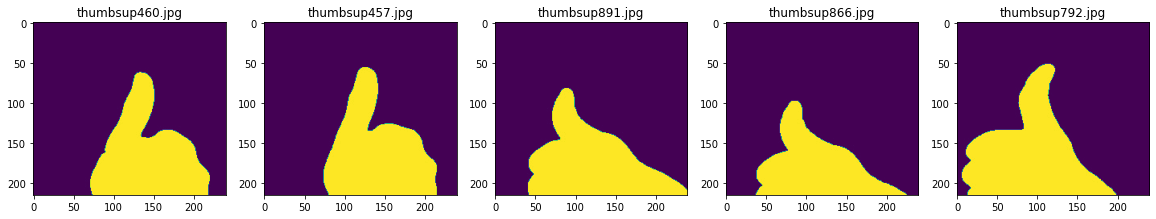

In [13]:
plt.figure(figsize=(20,20))
img_folder="HandGest/data/thumbsup"
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [15]:
IMG_WIDTH=125
IMG_HEIGHT=125
img_folder='HandGest/data'

In [16]:
!rm -r 'HandGest/data/blank'

In [17]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            image = np.stack((image,)*3, axis=-1)
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
    
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [18]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
print(target_dict)
target_val= [target_dict[class_name[i]] for i in range(len(class_name))]

{'fist': 0, 'five': 1, 'ok': 2, 'thumbsdown': 3, 'thumbsup': 4}


In [19]:
x_data = np.array(img_data, np.float32)
y_data = np.array(list(map(int,target_val)))
y_data = y_data.reshape(y_data.shape[0],1)
print(x_data.shape, y_data.shape)

(8705, 125, 125, 3) (8705, 1)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [23]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(125, 125,3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 61, 61, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 62725     
Total params: 83,653
Trainable params: 83,653
Non-trainable params: 0
__________________________________________________

In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
436/436 [==============================] - 2s 5ms/step - loss: 0.1054 - accuracy: 0.9614 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 2/10
436/436 [==============================] - 2s 5ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 2.5672e-05 - val_accuracy: 1.0000
Epoch 3/10
436/436 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 2.5360e-06 - val_accuracy: 1.0000
Epoch 4/10
436/436 [==============================] - 2s 4ms/step - loss: 7.0891e-04 - accuracy: 0.9999 - val_loss: 2.0653e-06 - val_accuracy: 1.0000
Epoch 5/10
436/436 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 1.3812e-07 - val_accuracy: 1.0000
Epoch 6/10
436/436 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.4875e-06 - val_accuracy: 1.0000
Epoch 7/10
436/436 [==============================] - 2s 5ms/step - loss: 7.1437e-08 - accuracy: 1.0000 - val_loss: 5.0698e-

In [25]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

28/28 [==============================] - 0s 5ms/step - loss: 1.9161e-09 - accuracy: 1.0000
Accuracy:1.0


You'll get slightly different numbers each time you run it but you should be getting between 99.9 and 100% accuracy. Great!

In [29]:
image = cv2.imread("/content/HandGest/data/thumbsdown/down0.jpg")
image = cv2.resize(image, (125,125))
image=np.array(image)
image = image.astype('float32')
image /= 255 
image = image.reshape(-1,125,125,3)
image.shape
np.argmax(model.predict(image), axis=-1)[0]

3

In [31]:
model.save("CNN.h5")